<a href="https://colab.research.google.com/github/IlfGauhnith/TM/blob/main/03c_ExercicioClassificacao_english.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise: Sentiment Analysis in Forums

In [ ]:
import pandas as pd

df = pd.read_csv("forum.csv")
df.head()

,Disciplina,Autor,Postagem,Sentimento (0 - negativo; 5 - neutro; 10 - positivo),"Classe (pergunta, resposta, neutro)",Assunto da postagem,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,Estatística Descritiva,professor,Mais uma vez sejam bem vindos a disciplina de ...,5,Neutro,NaN,NaN,NaN,NaN
1,Estatística Descritiva,professor,Como estão os estudos? Já começaram a ver o ma...,5,Pergunta,NaN,NaN,NaN,NaN
2,Estatística Descritiva,aluno1,Bom dia. Sim. Pra ser mais preciso comecei a a...,5,Neutro,NaN,NaN,NaN,NaN
3,Estatística Descritiva,aluno2,Iniciei hoje meus estudos nessa matéria !!! A ...,8,resposta,Introdução à Estatística descritiva,NaN,NaN,NaN
4,Estatística Descritiva,professor,Expliquem com suas palavras os conceitos: 1 - ...,5,Pergunta,Introdução à Estatística descritiva,Medidas de tendência central,Medidas de Posição,Medidas de dispersão


Analyze the distribution of classes, indicated in the `Classe (pergunta, resposta, neutro)` column

neutro's probability: 0.22556390977443608
pergunta's probability: 0.06015037593984962
resposta's probability: 0.7142857142857143


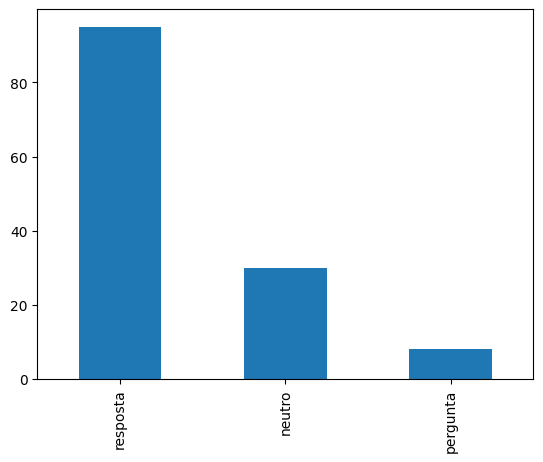

In [ ]:
df['Classe (pergunta, resposta, neutro)'] = df['Classe (pergunta, resposta, neutro)'].apply(str.lower)
df['Classe (pergunta, resposta, neutro)'].value_counts().plot(kind='bar')

for unq_value in df['Classe (pergunta, resposta, neutro)'].unique():
  probability = len(df[ df['Classe (pergunta, resposta, neutro)'] == unq_value]) / len(df['Classe (pergunta, resposta, neutro)'])
  print(f"{unq_value}'s probability: {probability}")

Analyze the distribution of review sizes, plot a histogram (`DataFrame.plot.hist()`)

Characters histogram before preprocessing


<Axes: ylabel='Frequency'>

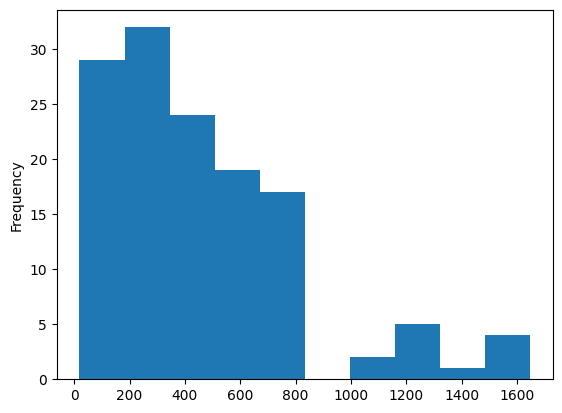

In [ ]:
print("Characters histogram before preprocessing")
df['Postagem'].apply(lambda x: len(x)).plot.hist()

Characters histogram after preprocessing


<Axes: ylabel='Frequency'>

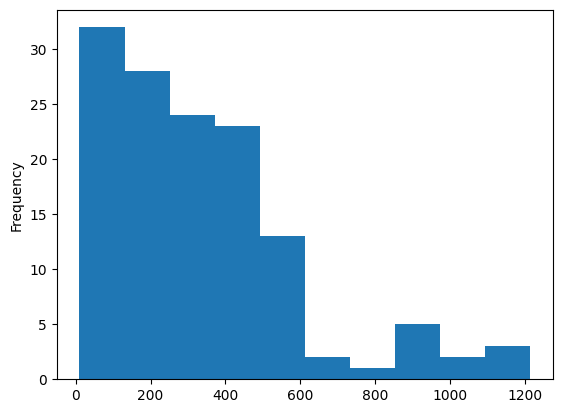

In [ ]:
print("Characters histogram after preprocessing")
df['Postagem'].apply(lambda text: ' '.join([token.text for token in nlp(text) if not token.is_stop]).lower()).apply(lambda x: len(x)).plot.hist()

Tokens histogram after preprocessing


<Axes: ylabel='Frequency'>

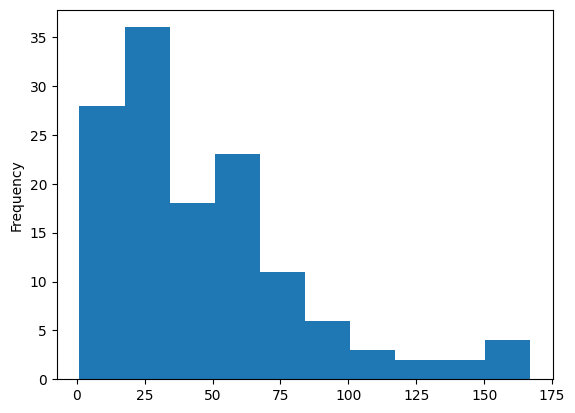

In [ ]:
print("Tokens histogram after preprocessing")
df['Postagem'].apply(lambda text: ' '.join([token.text for token in nlp(text) if not token.is_stop]).lower()).apply(lambda x: len(x.split(' '))).plot.hist()

Apply Sklearn's categorical label encoding function ([LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)) to convert class labels to numbers. Save in an additional column in the dataframe.

In [ ]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(df['Classe (pergunta, resposta, neutro)'].unique())
print(f"Column 'Classe (pergunta, resposta, neutro)' classes: {list(label_encoder.classes_)}")

df['Classe (pergunta, resposta, neutro) - ENCODED'] = df['Classe (pergunta, resposta, neutro)'].apply(lambda x: label_encoder.transform([x])[0])
df[['Classe (pergunta, resposta, neutro)', 'Classe (pergunta, resposta, neutro) - ENCODED']]

Column 'Classe (pergunta, resposta, neutro)' classes: ['neutro', 'pergunta', 'resposta']


,"Classe (pergunta, resposta, neutro)","Classe (pergunta, resposta, neutro) - ENCODED"
0,neutro,0
1,pergunta,1
2,neutro,0
3,resposta,2
4,pergunta,1
...,...,...
128,resposta,2
129,resposta,2
130,resposta,2
131,resposta,2


Apply the pre-processing pipeline using NLTK or SpaCy (tokenization and stopword removal), and then use the Scikit-Learn transformation functions for texts, using the n-gram attributes to classify the texts:
```
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(use_idf=True)
```
In which you can pass the values of n-gram ranges:
- an ngram range of (1, 1) means unigrams only
- (1, 2) means unigrams and bigrams
- (2, 2) means only bigrams

In [ ]:
!python -m spacy download pt_core_news_lg

2023-06-26 01:23:33.247744: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 568.2/568.2 MB 1.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_lg')


In [ ]:
import pt_core_news_lg
nlp = pt_core_news_lg.load()

In [ ]:
df['Postagem'] = df['Postagem'].apply(lambda text: ' '.join([token.text for token in nlp(text) if not token.is_stop]))
df['Postagem'] = df['Postagem'].apply(str.lower)
df['Postagem']

0      sejam vindos disciplina análise dados . vamos ...
1                         estudos ? começaram material ?
2      dia . . pra preciso comecei assistir vídeo aul...
3      iniciei hoje estudos matéria ! ! ! estatística...
4      expliquem palavras conceitos : 1 - distribuiçã...
                             ...                        
128    ai aluno , podemos método amostragem definido ...
129    método amostragem conveniente permite selecion...
130    população : conjunto indivíduos objetos aprese...
131      teorema central limite   importante resultad...
132    , pesquisa tendenciosa 400 representaria contr...
Name: Postagem, Length: 133, dtype: object

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizers = {
    'unigram_only': TfidfVectorizer(use_idf=True, ngram_range=(1, 1)),
    'unigram_bigram': TfidfVectorizer(use_idf=True, ngram_range=(1, 2)),
    'bigram_only': TfidfVectorizer(use_idf=True, ngram_range=(2, 2))
}

X = df.Postagem.values
X_tfidf = {}
tfidf_models = {}

print('----------------------------------------------')
for key, vectorizer in vectorizers.items():
  tfidf_model = vectorizer.fit(X)

  tfidf_models[key] = tfidf_model

  print(f"ngram {vectorizer.ngram_range}")
  print(f"some features: {vectorizer.get_feature_names_out()[100:111]}")

  X_tfidf[key] = tfidf_model.transform(X)

  print("tf-idf values of the first text")
  print(X_tfidf[key][0,:])
  print('----------------------------------------------')

----------------------------------------------
ngram (1, 1)
some features: ['ajuste' 'aleatoria' 'aleatoriamente' 'aleatória' 'aleatórias'
 'aleatórios' 'alfa' 'alguem' 'algum' 'alguma' 'alta']
tf-idf values of the first text
  (0, 1514)	0.14472373471840255
  (0, 1482)	0.2751312363134221
  (0, 1324)	0.10691421792912542
  (0, 1316)	0.12677208423954112
  (0, 1282)	0.16695887565630663
  (0, 1236)	0.16695887565630663
  (0, 1218)	0.12248859378049842
  (0, 1155)	0.16695887565630663
  (0, 1132)	0.1539521520093829
  (0, 1097)	0.1539521520093829
  (0, 881)	0.1539521520093829
  (0, 797)	0.11871028742455506
  (0, 646)	0.14472373471840255
  (0, 618)	0.1002534528425943
  (0, 571)	0.1539521520093829
  (0, 534)	0.13756561815671106
  (0, 498)	0.12248859378049842
  (0, 493)	0.41269685447013316
  (0, 479)	0.16695887565630663
  (0, 454)	0.14472373471840255
  (0, 408)	0.07006809268937696
  (0, 314)	0.12248859378049842
  (0, 290)	0.33391775131261325
  (0, 288)	0.1539521520093829
  (0, 201)	0.15395215200938

Split the training and testing sets. Use the `sklearn.model_selection.train_test_split()` function

In [ ]:
from sklearn.model_selection import train_test_split

Y = df['Classe (pergunta, resposta, neutro) - ENCODED'].values

tfidf_sets = {}

for key, value in X_tfidf.items():
  tfidf_train, tfidf_test, class_train, class_test = train_test_split(value, Y, test_size=0.25)

  tfidf_sets[key] = {'tfidf_train': tfidf_train,
                     'tfidf_test': tfidf_test,
                     'class_train': class_train,
                     'class_test': class_test}


Train a model with the `NaiveBayes` algorithm, and save the predictions for the test set in the `preds` variable

In [ ]:
from sklearn.naive_bayes import MultinomialNB

models = {
    'unigram_only': MultinomialNB(),
    'unigram_bigram': MultinomialNB(),
    'bigram_only': MultinomialNB()
}

preds = {
    'unigram_only': [],
    'unigram_bigram': [],
    'bigram_only': []
}

classifiers = {}

for key, model in models.items():
  clf = model.fit(tfidf_sets[key]['tfidf_train'], tfidf_sets[key]['class_train'])
  classifiers[key] = clf
  preds[key] = clf.predict(tfidf_sets[key]['tfidf_test'])

Analyze prediction results

In [ ]:
from sklearn import metrics

print('----------------------------------------------')
for key, pred in preds.items():
  print(key)
  print(metrics.classification_report(tfidf_sets[key]['class_test'], preds[key], labels=label_encoder.transform(label_encoder.classes_), target_names=label_encoder.classes_))
  print('----------------------------------------------')

print(label_encoder.classes_)

----------------------------------------------
unigram_only
              precision    recall  f1-score   support

      neutro       0.00      0.00      0.00         9
    pergunta       0.00      0.00      0.00         2
    resposta       0.68      1.00      0.81        23

    accuracy                           0.68        34
   macro avg       0.23      0.33      0.27        34
weighted avg       0.46      0.68      0.55        34

----------------------------------------------
unigram_bigram
              precision    recall  f1-score   support

      neutro       0.00      0.00      0.00         6
    pergunta       0.00      0.00      0.00         3
    resposta       0.74      1.00      0.85        25

    accuracy                           0.74        34
   macro avg       0.25      0.33      0.28        34
weighted avg       0.54      0.74      0.62        34

----------------------------------------------
bigram_only
              precision    recall  f1-score   support

  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

Discuss the results

In [ ]:
msg = 'Qual é o método de amostragem mais eficiente para esse problema?'


preprocessed_msg = [token.text for token in nlp(msg) if not token.is_stop]
preprocessed_msg = " ".join(preprocessed_msg).lower()


print(f"Before preprocessing: {msg}")
print(f"After preprocessing: {preprocessed_msg}")

for key, tfidf_model in tfidf_models.items():
  prediction = classifiers[key].predict(tfidf_model.transform([preprocessed_msg]))
  prediction = label_encoder.inverse_transform(prediction)[0]

  print(f"{key} tfidf: {prediction}")

Before preprocessing: Qual é o método de amostragem mais eficiente para esse problema?
After preprocessing: método amostragem eficiente problema ?
unigram_only tfidf: resposta
unigram_bigram tfidf: resposta
bigram_only tfidf: resposta


Me parece que o desbalanceamento da base é responsável pelo desempenho pobre do modelo.  
Será que configurar o algoritmo para desconsiderar a prior probability das classes faria diferença?  
Encontrei também o
[ComplementNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.ComplementNB.html#:~:text=The%20Complement%20Naive%20Bayes%20classifier%20was%20designed%20to%20correct%20the,New%20in%20version%200.20.&text=Additive%20(Laplace%2FLidstone)%20smoothing,(0%20for%20no%20smoothing).).
Ele é útil em problemas onde o dataset é desbalanceado pois foi desenvolvido de forma a lidar com as "suposições ingênuas" feitas pelo Naive Bayes.  
Abaixo irei testar o ComplementNB com unigrams.

#ComplementNB

In [ ]:
!python -m spacy download pt_core_news_lg

2023-06-26 01:24:14.556196: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached https://github.com/explosion/spacy-models/releases/download/pt_core_news_lg-3.5.0/pt_core_news_lg-3.5.0-py3-none-any.whl (568.2 MB)
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_lg')


In [ ]:
from sklearn import preprocessing
import pandas as pd
import pt_core_news_lg
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import ComplementNB
from sklearn import metrics

nlp = pt_core_news_lg.load()

df = pd.read_csv("forum.csv")
df.head()

df['Classe (pergunta, resposta, neutro)'] = df['Classe (pergunta, resposta, neutro)'].apply(str.lower)

label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(df['Classe (pergunta, resposta, neutro)'].unique())
df['Classe (pergunta, resposta, neutro) - ENCODED'] = df['Classe (pergunta, resposta, neutro)'].apply(lambda x: label_encoder.transform([x])[0])

df['Postagem'] = df['Postagem'].apply(lambda text: ' '.join([token.text for token in nlp(text) if not token.is_stop]))
df['Postagem'] = df['Postagem'].apply(str.lower)


vectorizer = TfidfVectorizer(use_idf=True, ngram_range=(1, 1))

X = df.Postagem.values
tfidf_model = vectorizer.fit(X)
X_tfidf = tfidf_model.transform(X)



Y = df['Classe (pergunta, resposta, neutro) - ENCODED'].values
tfidf_train, tfidf_test, class_train, class_test = train_test_split(X_tfidf, Y, test_size=0.25)



model = ComplementNB()

clf = model.fit(tfidf_train, class_train)
pred = clf.predict(tfidf_test)


print(metrics.classification_report(class_test, pred, labels=label_encoder.transform(label_encoder.classes_), target_names=label_encoder.classes_))

              precision    recall  f1-score   support

      neutro       0.83      0.50      0.62        10
    pergunta       0.29      0.67      0.40         3
    resposta       1.00      1.00      1.00        21

    accuracy                           0.82        34
   macro avg       0.71      0.72      0.67        34
weighted avg       0.89      0.82      0.84        34



Houve uma melhora considerável!